<a href="https://colab.research.google.com/github/ThuyHaLE/Problem3_Natural-Language-Processing/blob/main/NLU_Part_Of_SpeechTagging(Hidden_MarkovModel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Natural Language Understanding (NLU)**

- **Core functionalities**:
  - ***Extracting Meaning***: aims to understand the intent, sentiment, and overall message conveyed in a sentence or passage.
  - ***Analyzing Context***: considers the context surrounding the language. For instance, "the bank is closed" can have different meanings depending on the context (financial institution vs. riverbank).
  - ***Disambiguation***: Language can be ambiguous at times. NLU tackles situations where a word or phrase can have multiple meanings.

- **How NLU works**:
  - ***Breaking it down***: break down the input text into smaller components like words, phrases, and sentences.
  - ***Understanding Relationships***: analyzes the relationships between these components. This involves part-of-speech tagging (identifying nouns, verbs, etc.) and recognizing grammatical structures.
  - ***Deriving Meaning***: Based on the analysis, infer the meaning of the text. This might involve considering the context in which the language is used.

-  **Common NLU tasks**:
  - ***Text Classification***: automatically categorizing a text into predefined categories. Examples: sentiment analysis (positive, negative, neutral), spam filtering (spam, not spam), or topic labeling (sports, politics, entertainment).
  - ***Named Entity Recognition (NER)***: identifies and classifies named entities within a text, such as people, organizations, locations, dates, monetary values, etc for information extraction or question answering.
  - ***Text Summarization***: generate a concise summary of a long text while preserving the key points and meaning. Summarization can be beneficial for quickly grasping the main idea of an article or document.
  - ***Machine Translation***: plays a vital role in machine translation, where the system understands the source language (e.g., English) and translates it accurately into the target language (e.g., Spanish) while preserving the meaning and intent.
  - ***Question Answering***: answer questions for information retrieval from a knowledge base or open-ended, more challenging questions that require reasoning and inference.
  - ***Part-of-Speech Tagging (POS)***: assigns grammatical labels (e.g., noun, verb, adjective) to each word in a sentence. POS tagging is a fundamental step in NLU, providing valuable information about the sentence structure that can be used for various downstream tasks.
  - ***Sentiment Analysis***: goes beyond simple classification (positive, negative) and aims to understand a text's emotional tone or opinion. This can involve analyzing the sentiment of product reviews, social media posts, or customer feedback data.
  - ***Dialogue Management***: in chatbots or virtual assistants. It allows the system to understand the user's intent within a conversation, track the conversation flow, and generate appropriate responses.
  - ***Textual Entailment***: determines whether the meaning of one sentence (hypothesis) is entailed by the definition of another sentence (text). It requires the NLU system to understand the logical relationships between sentences.
  - ***Natural Language Inference***: involves reasoning about the relationship between two sentences (Similar to textual entailment). The system determines if the second sentence (hypothesis) can be inferred from the first sentence (premise).

#**Part-of-Speech Tagging (POS)**

In [ ]:
#install Pomegranate - a graphical models library for Python
!pip install pomegranate==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pomegranate: filename=pomegranate-0.12.0-cp310-cp310-linux_x86_64.whl size=12877500 sha256=31ea8baa08af2b4d8159baa696ee47f731c0906f2828fe08f1a07ca52474dbcb
  Stored in directory: /root/.cache/pip/wheels/2b/70/cb/9cdb862af960baf0fc3c2c461456ee721ef08a14b76c6935bb
Successfully built pomegranate


In [ ]:
#Import some libraries
#nltk
import nltk
nltk.download('brown')
nltk.download('universal_tagset')
from nltk.corpus import brown
from nltk import pos_tag, word_tokenize
#collections
from collections import Counter, defaultdict
#sklearn
from sklearn.model_selection import train_test_split
#pomegranate
from pomegranate import State, HiddenMarkovModel, DiscreteDistribution

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


##**Build an HHM Tagger**

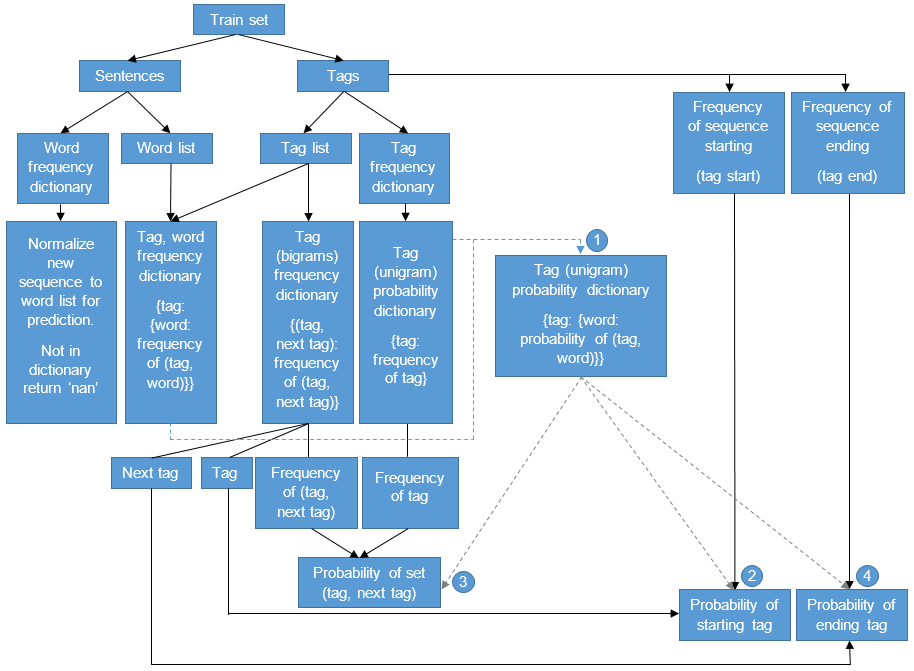

###Data preparation

In [ ]:
#Load Brown Corpus
class BROWNDataset():
  def __init__(self, ratio_split=0.2):
    self.ratio_split = ratio_split
    self.train_sentences, self.test_sentences, self.train_tags, self.test_tags = self.load_data() #Load and split data
    self.word_vocab, self.words = self.build_vocabulary(self.train_sentences) #built frequency dictionary and word list for train set (sentences)
    self.tag_vocab, self.tags = self.build_vocabulary(self.train_tags) #built frequency dictionary and tag list for train set (tags)

  def load_data(self): #Load and split data into train set and test set
    #sub-lists in list (brown_corpus), a sub-list includes sets include pairs (word, parts of speech)
    brown_corpus = nltk.corpus.brown.tagged_sents(tagset='universal')
    sentences, tags = [], [] #data includes sentences and tags
    for pairs in brown_corpus: #loop for each sub-list
      sentence = [pair[0] for pair in pairs] #sentence = list of words
      tag = [pair[1] for pair in pairs] #tag = list of parts of speech
      sentences.append(sentence)
      tags.append(tag)
    return train_test_split(sentences, tags, test_size=self.ratio_split, random_state=42)

  def build_vocabulary(self, sentences):
    tokens = [] #word list
    for sentence in sentences: #loop for each sentence (list of words) in sentences
      tokens.extend(sentence) #extend list of words to word list
    vocab = Counter(tokens) #count frequency of each word in word list
    return dict(vocab), tokens #return frequency dictionary, word list

#Load Brown Corpus
brown_dataset = BROWNDataset()

#Train set and test set
print(f'train_sentences: {len(brown_dataset.train_sentences)}, \n{brown_dataset.train_sentences[:3]}')
print(f'train_tags: {len(brown_dataset.train_tags)}, \n{brown_dataset.train_tags[:3]}')
print(f'test_sentences: {len(brown_dataset.test_sentences)}, \n{brown_dataset.test_sentences[:3]}')
print(f'test_tags: {len(brown_dataset.test_tags)}, \n{brown_dataset.test_tags[:3]}')
print('---')

#train set (sentences) => word frequency dictionary and word list
print(f'word frequency dictionary: {len(brown_dataset.word_vocab)}, \n{brown_dataset.word_vocab}')
print(f'word list: {len(brown_dataset.words)}, \n{brown_dataset.words[:10]}')
print('---')

#train set (tags) => tag frequency dictionary and tag list
print(f'tag frequency dictionary: {len(brown_dataset.tag_vocab)}, \n{brown_dataset.tag_vocab}')
print(f'tag list: {len(brown_dataset.tags)}, \n{brown_dataset.tags[:10]}')

train_sentences: 45872, 
[['frontiers', '.'], ['The', 'pastor', 'calls', 'in', 'the', 'home', 'of', 'each', 'individual', 'or', 'family', 'for', 'a', 'spiritual', 'guidance', 'conference', '.'], ['``', 'Standard', 'deal', ',', 'Mr.', 'Skyros', '.']]
train_tags: 45872, 
[['NOUN', '.'], ['DET', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'CONJ', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', '.'], ['.', 'ADJ', 'NOUN', '.', 'NOUN', 'NOUN', '.']]
test_sentences: 11468, 
[['Open', 'market', 'policy'], ['And', 'you', 'think', 'you', 'have', 'language', 'problems', '.'], ['Mae', 'entered', 'the', 'room', 'from', 'the', 'hallway', 'to', 'the', 'kitchen', '.']]
test_tags: 11468, 
[['ADJ', 'NOUN', 'NOUN'], ['CONJ', 'PRON', 'VERB', 'PRON', 'VERB', 'NOUN', 'NOUN', '.'], ['NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', '.']]
---
word frequency dictionary: 50595, 
{'frontiers': 4, '.': 39409, 'The': 5815, 'pastor': 13, 'calls': 57, 'in': 15752, 'the': 50060, 

In [ ]:
def pair_counts(tags, sequences):
  dic = defaultdict(dict)
  cnts = dict(Counter(list(zip(tags, sequences)))) #dictionary with key: (tag, word), value: frequence of (tag, word)
  #dictionary with key: tag, value: (word, frequence of (tag, word))
  for key, value in cnts.items():
      dic[key[0]][key[1]] = value
  return dic

#word list + tag list => Dictionary with key: tag, value: (word, frequence of (tag, word))
emission_counts = pair_counts(brown_dataset.tags, brown_dataset.words)
print(emission_counts)

defaultdict(<class 'dict'>, {'NOUN': {'frontiers': 4, 'pastor': 13, 'home': 413, 'individual': 70, 'family': 254, 'guidance': 27, 'conference': 44, 'deal': 76, 'Mr.': 654, 'Skyros': 16, 'Mills': 14, 'figuring': 1, 'scrap': 7, 'paper': 124, 'kinds': 32, 'boards': 37, 'two-by-fours': 1, 'workbench': 6, 'Phil': 59, 'Start': 1, 'tour': 31, 'Machine': 3, 'Tool': 1, 'Division': 31, 'Brown': 81, 'Sharpe': 26, 'spindle': 8, 'screw': 16, 'machines': 48, 'types': 96, 'knee': 26, 'Washington': 165, 'state': 404, 'court': 87, "state's": 16, 'occupation': 20, 'tax': 151, 'sales': 92, 'cost': 146, 'oil': 68, 'company': 170, 'subsidiary': 6, 'supplies': 25, 'identity': 40, 'parent': 13, 'Polyphosphates': 1, 'life': 550, 'soap': 15, 'products': 72, 'time': 1245, 'surfactants': 2, 'threat': 39, 'polyphosphates': 4, 'decline': 20, 'usage': 11, 'synergism': 1, 'detergent': 22, 'actives': 8, 'appearance': 46, 'Borden': 12, 'iota': 1, 'baggage': 4, 'weeks': 107, 'algae': 5, 'effluent': 13, "BOD's": 1, 'Aj'

In [ ]:
def starting_ending_counts(sequences):
  #Sequence Starting Counts
  starting_counts = dict(Counter([i[0] for i in sequences]))
  #Sequence Ending Counts
  ending_counts = dict(Counter([i[-1] for i in sequences]))
  return starting_counts, ending_counts

print(f'maximum length in train set (tags): {max([len(sequence) for sequence in brown_dataset.train_tags])}')
print(f'minimum length in train set (tags): {min([len(sequence) for sequence in brown_dataset.train_tags])}')
print('---')
#train set (tags) => frequency dictionary for Sequence Starting and Sequence Ending
tag_starts, tag_ends = starting_ending_counts(brown_dataset.train_tags)
print(f'Sequence Starting Counts: {len(tag_starts)}, {tag_starts}')
print(f'Sequence Ending Counts: {len(tag_ends)}, {tag_ends}')

maximum length in train set (tags): 180
minimum length in train set (tags): 1
---
Sequence Starting Counts: 12, {'NOUN': 6465, 'DET': 9771, '.': 4091, 'VERB': 2113, 'PRON': 7351, 'ADP': 5678, 'ADV': 4136, 'NUM': 769, 'PRT': 1700, 'CONJ': 2222, 'ADJ': 1558, 'X': 18}
Sequence Ending Counts: 12, {'.': 44923, 'NOUN': 727, 'ADV': 18, 'DET': 14, 'VERB': 76, 'ADJ': 25, 'PRON': 4, 'NUM': 65, 'ADP': 8, 'CONJ': 2, 'PRT': 9, 'X': 1}


###Modeling

In [ ]:
#Initializing HHM Model
basic_model = HiddenMarkovModel(name="base-hmm-tagger")

Unigram Counts $P(tag_1) = \frac{C(tag_1)}{N}$

In [ ]:
#frequency dictionary for tag_unigram (available)
tag_unigram = brown_dataset.tag_vocab
print(len(tag_unigram))
print(tag_unigram)

#Updating model with unigram probability
states = {}
for tag in emission_counts.keys():
  total = tag_unigram[tag] #frequency of tag
  #dictionary with key: tag, value: (word, probability of (tag, word))
  prob_dist = {key: value / total for key, value in emission_counts[tag].items()}
  #probabilistic modeling using pomegranate
  tag_distribution = DiscreteDistribution(prob_dist)
  temp_state = State(tag_distribution, name=tag)
  states[tag] = temp_state
  #updating model
  basic_model.add_state(states[tag])

12
{'NOUN': 220736, '.': 118045, 'DET': 109545, 'VERB': 146006, 'ADP': 115998, 'CONJ': 30622, 'ADJ': 66949, 'PRON': 39400, 'ADV': 44968, 'PRT': 23976, 'NUM': 11963, 'X': 1057}


Bigram Counts $P(tag_2|tag_1) = \frac{C(tag_2|tag_1)}{C(tag_2)}$

In [ ]:
def bigram_counts(sequences):
  #dictionary with key: (tag, next tag), value: frequence of (tag, next tag)
  bigram_counts = {}
  for _, sentence in enumerate(sequences): #loop for each sentence (list of words)
    for b in range(len(sentence) - 1): #loop for each index in list of words
      #if tag in position b and b+1 in bigram_counts => (tag, next tag): frequence += 1, else 1
      if (sentence[b], sentence[b+1]) in bigram_counts:
        bigram_counts[(sentence[b], sentence[b+1])] += 1
      else:
        bigram_counts[(sentence[b], sentence[b+1])] = 1
  return bigram_counts

#tag list => frequency dictionary for tag_bigrams (C(tag_2|tag_1))
tag_bigrams = bigram_counts(brown_dataset.train_tags)
print(len(tag_bigrams))
print(tag_bigrams)

#Updating model with bigrams probability
for bigram in tag_bigrams.keys(): #for each (tag, next tag) in tag_bigrams
  len_data = len(brown_dataset.train_sentences)
  b0 = bigram[0] #tag
  b1 = bigram[1] #next tag
  prob =  tag_starts[b0] / len_data #probability of starting tag
  basic_model.add_transition(basic_model.start, states[b0], prob) #update model
  prob = tag_bigrams[bigram] / tag_unigram[b0] #probability of (tag, next tag)
  basic_model.add_transition(states[b0], states[b1], prob)#update model
  prob = tag_ends[b0] / len_data #probability of ending tag
  basic_model.add_transition(states[b0], basic_model.end, prob)#update model
basic_model.bake()

143
{('NOUN', '.'): 62646, ('DET', 'NOUN'): 68585, ('NOUN', 'VERB'): 34816, ('VERB', 'ADP'): 24717, ('ADP', 'DET'): 52768, ('NOUN', 'ADP'): 54094, ('NOUN', 'CONJ'): 13212, ('CONJ', 'NOUN'): 7427, ('DET', 'ADJ'): 26283, ('ADJ', 'NOUN'): 43737, ('NOUN', 'NOUN'): 33075, ('.', 'ADJ'): 3410, ('.', 'NOUN'): 9765, ('VERB', 'VERB'): 26774, ('VERB', 'DET'): 23793, ('ADP', 'NOUN'): 30087, ('CONJ', 'VERB'): 5985, ('VERB', 'PRON'): 8057, ('PRON', 'DET'): 679, ('NOUN', 'DET'): 3410, ('DET', '.'): 1381, ('.', 'ADV'): 5132, ('ADV', 'VERB'): 10797, ('VERB', '.'): 11762, ('.', 'VERB'): 9084, ('.', 'PRON'): 5441, ('PRON', 'VERB'): 27861, ('PRON', '.'): 4065, ('.', '.'): 12648, ('ADP', 'VERB'): 4815, ('VERB', 'ADV'): 15104, ('ADV', '.'): 7656, ('VERB', 'NOUN'): 14275, ('NOUN', 'ADJ'): 2813, ('ADP', 'ADJ'): 9557, ('.', 'CONJ'): 8209, ('CONJ', 'ADJ'): 3470, ('ADJ', 'VERB'): 1162, ('.', 'ADP'): 7689, ('VERB', 'PRT'): 9593, ('PRT', 'PRT'): 284, ('PRT', 'VERB'): 14901, ('VERB', 'ADJ'): 8389, ('NOUN', 'ADV'): 

In [ ]:
#All tags available
print([s.name for s in basic_model.states])

['.', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM', 'PRON', 'PRT', 'VERB', 'X', 'base-hmm-tagger-start', 'base-hmm-tagger-end']


###Prediction and Evaluation

In [ ]:
def predict(sequence, model=basic_model):
  #replace word in sequence by nan if it not in the frequency dictionary of train set (sentences)
  sequence_ = [word if word in brown_dataset.word_vocab else 'nan' for word in sequence]
  _, state_path = model.viterbi(sequence_) #prediction
  predicted_tag = [state[1].name for state in state_path[1:-1]]
  return predicted_tag #return predicted_tag

def compuate_accuracy(sentences, tags, model=basic_model):
  correct = total_predictions = 0
  for sentence, tag in zip(sentences, tags):
    try:
      pred_tags = predict(sentence, model) #prediction
      correct += sum(p == t for p, t in zip(pred_tags, tag)) #if corrected += number of corrections
    except:
      pass
    total_predictions += len(sentence) #number of all predictions
  return correct / total_predictions #number of corrections/number of all predictions

#Evaluation
compuate_accuracy(brown_dataset.test_sentences, brown_dataset.test_tags, basic_model)

0.9599917215330686